In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/dataset/IMDBDataset.csv')

In [ ]:
# Extract the text and labels from the dataset
reviews = data['review'].values
labels = data['sentiment'].values

In [ ]:
# Encode labels to numerical values (0 for negative, 1 for positive)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(reviews, labels, test_size=0.2, random_state=42)


In [ ]:
# Tokenize the text and convert it to sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data)
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

In [ ]:
# Pad sequences to have the same length
train_data = pad_sequences(train_sequences, maxlen=256)
test_data = pad_sequences(test_sequences, maxlen=256)

In [ ]:
# Build the model
model = keras.Sequential([
    keras.layers.Embedding(10000, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history=model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1000/1000 [==============================] - 6s 5ms/step - loss: 0.4789 - accuracy: 0.7953 - val_loss: 0.3022 - val_accuracy: 0.8795
Epoch 2/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.2532 - accuracy: 0.9025 - val_loss: 0.2662 - val_accuracy: 0.8913
Epoch 3/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2049 - accuracy: 0.9230 - val_loss: 0.2679 - val_accuracy: 0.8901
Epoch 4/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1784 - accuracy: 0.9331 - val_loss: 0.2802 - val_accuracy: 0.8865
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1595 - accuracy: 0.9427 - val_loss: 0.2924 - val_accuracy: 0.8851
Epoch 6/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1440 - accuracy: 0.9490 - val_loss: 0.3153 - val_accuracy: 0.8834
Epoch 7/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1302 - accuracy: 0.9547 - val_loss: 0.3237 - val_accuracy:

In [ ]:
# Plot accuracy and loss charts
import matplotlib.pyplot as plt

def plot_metrics(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history[f'val_{metric}']
    epochs = range(1, len(train_metrics) + 1)
    
    plt.plot(epochs, train_metrics, 'bo--', label=f'Training {metric}')
    plt.title(f'Training and Validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

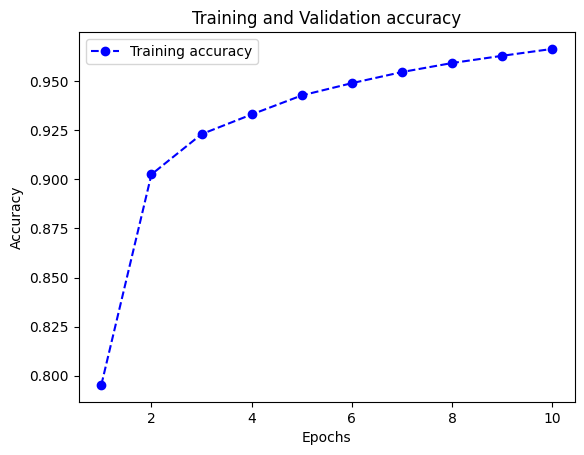

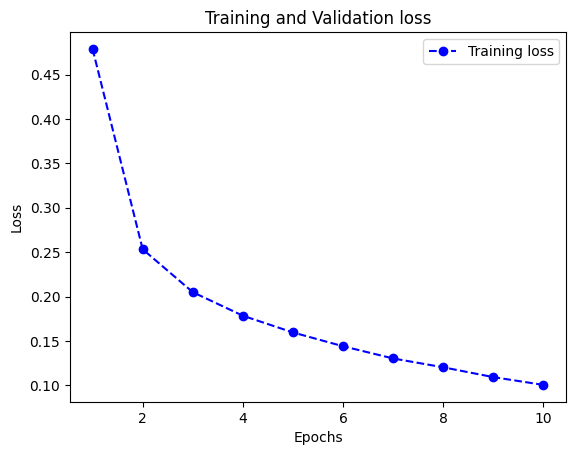

In [ ]:

plot_metrics(history, 'accuracy')
plot_metrics(history, 'loss')

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8759
Test Loss: 0.39811235666275024
Test Accuracy: 0.8758999705314636


In [ ]:
# Example inputs
new_reviews = [
    "This movie was fantastic! I highly recommend it.",
    "I couldn't stand this film. It was terrible.",
    "It was an average movie, nothing special.",
    "One of the best movies I've ever seen. Truly amazing!"
]


In [ ]:
# Tokenize and pad the new inputs
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_data = pad_sequences(new_sequences, maxlen=256)

# Make predictions on the new inputs
predictions = model.predict(new_data)

# Decode the predictions to get the sentiment labels
predicted_labels = label_encoder.inverse_transform([1 if p >= 0.5 else 0 for p in predictions])

# Print the predicted labels for the new inputs
for review, label in zip(new_reviews, predicted_labels):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {label}")
    print()

1/1 [==============================] - 0s 118ms/step
Review: This movie was fantastic! I highly recommend it.
Predicted Sentiment: positive

Review: I couldn't stand this film. It was terrible.
Predicted Sentiment: negative

Review: It was an average movie, nothing special.
Predicted Sentiment: negative

Review: One of the best movies I've ever seen. Truly amazing!
Predicted Sentiment: positive

